In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor
from sklearn import linear_model
from sklearn import svm
from math import sqrt
from scipy.stats import norm

housingData = pd.read_csv("/home/anaximander/ML-Course/california-house-project/data/housing.csv")
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housingCorr = housingData.corr()
housingCorr

/tmp/ipykernel_25273/2347629121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housingCorr = housingData.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [4]:
def graphCorr(data):
    '''
    Pass in a Pandas DataFrame and graph the correlation of the data using the seaborn libary
    '''
    data = data.corr()
    sns.heatmap(data, annot = True)

In [5]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


/tmp/ipykernel_25273/4152491567.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.corr()


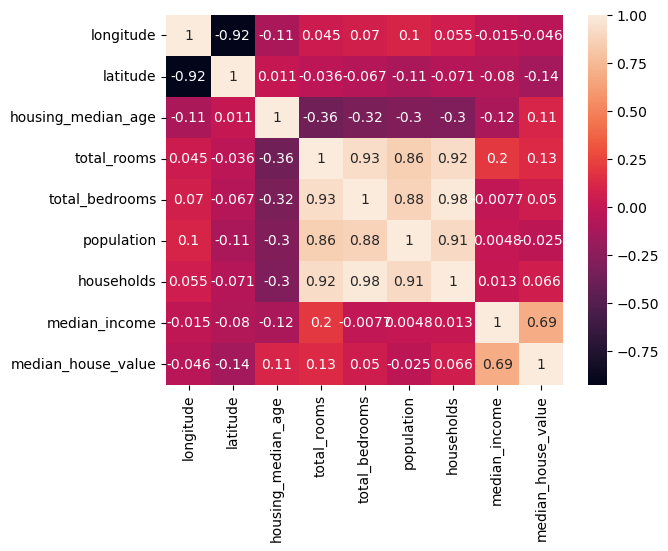

In [8]:
graphCorr(housingData)

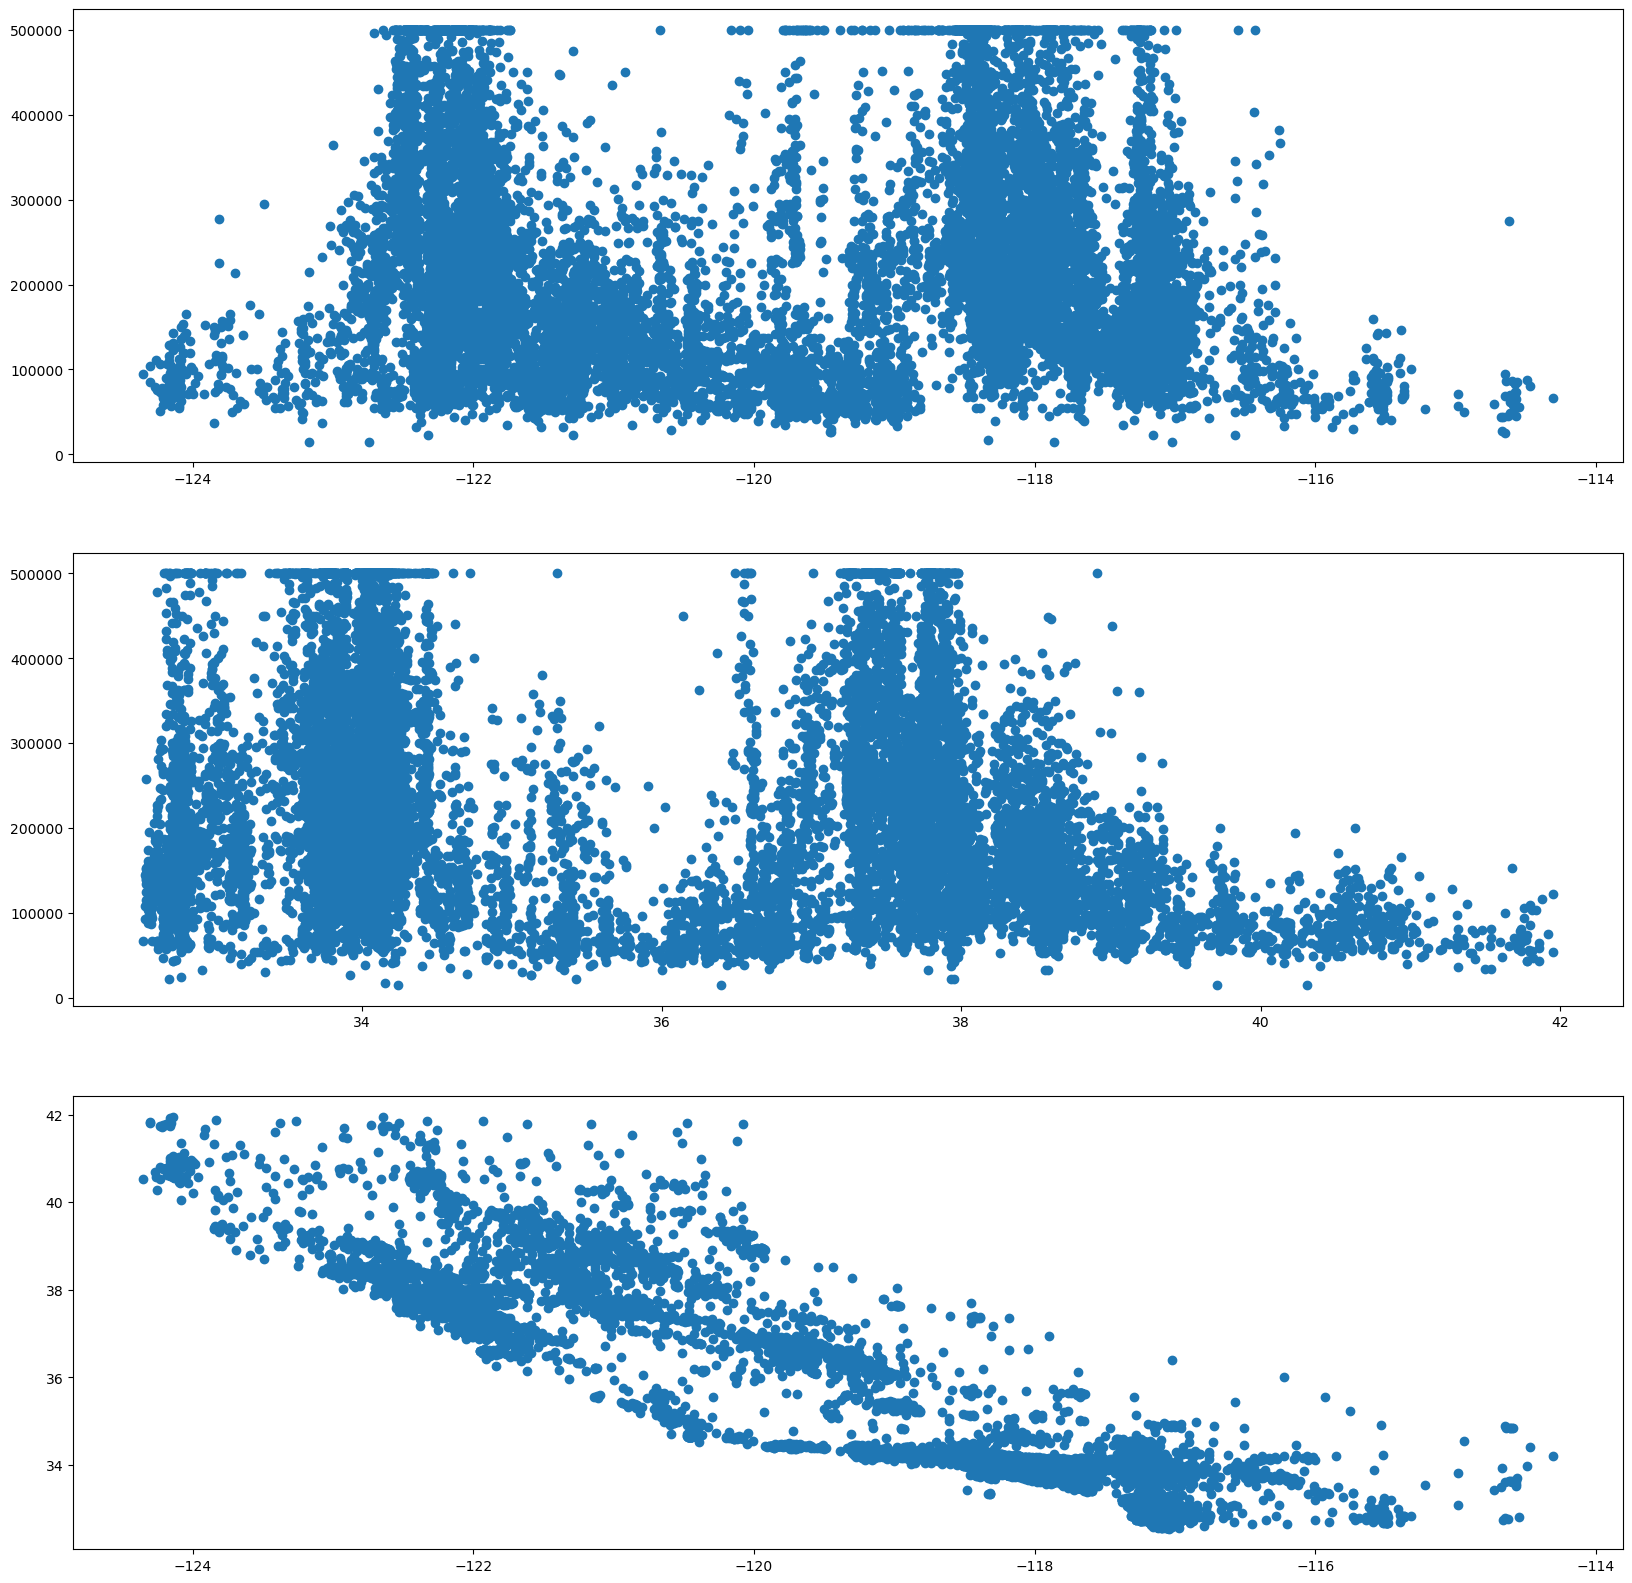

In [9]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (20,20))
ax[0].scatter(housingData["longitude"],housingData["median_house_value"])
ax[1].scatter(housingData["latitude"],housingData["median_house_value"])
ax[2].scatter(housingData["longitude"],housingData["latitude"])

In [10]:
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Text(0.5, 0, 'Total Rooms')

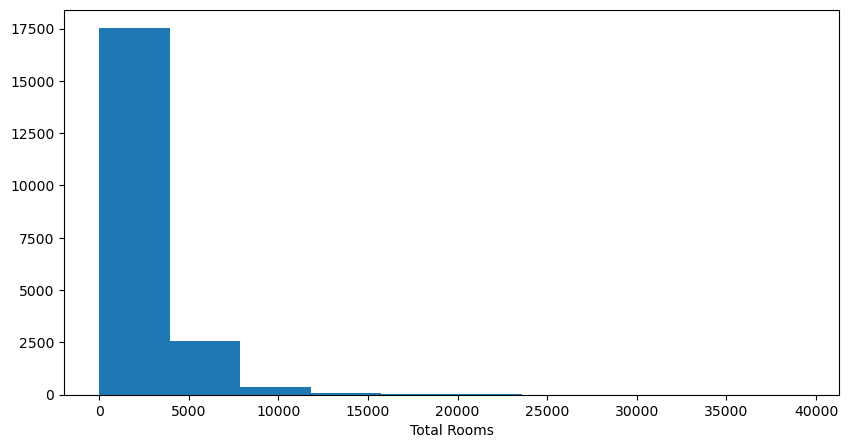

In [11]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(housingData["total_rooms"])
ax.set_xlabel("Total Rooms")


Text(0.5, 0, 'total_bedrooms')

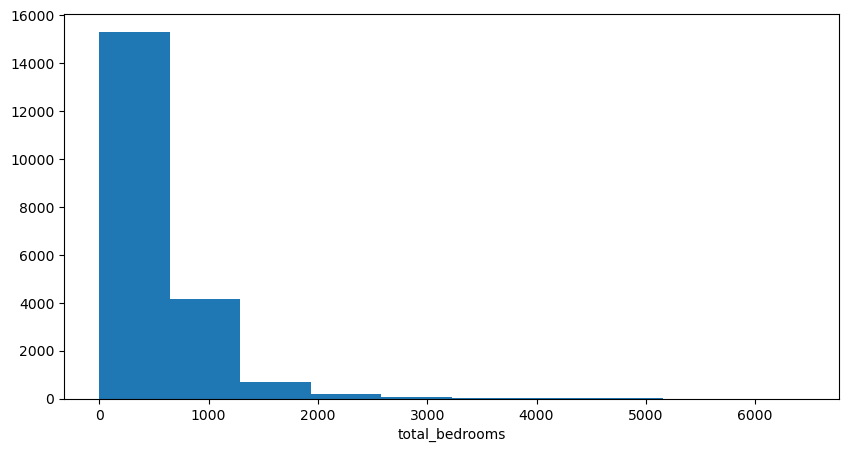

In [12]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(housingData["total_bedrooms"])
ax.set_xlabel("total_bedrooms")


Text(0.5, 0, 'population')

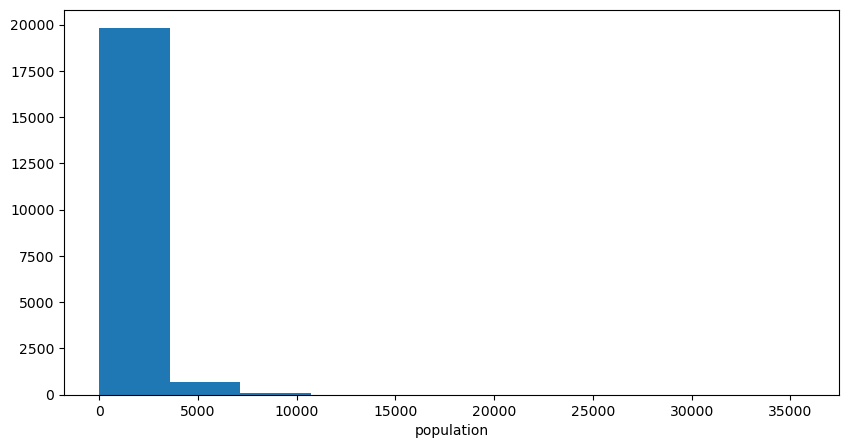

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(housingData["population"])
ax.set_xlabel("population")


Text(0.5, 0, 'median_income')

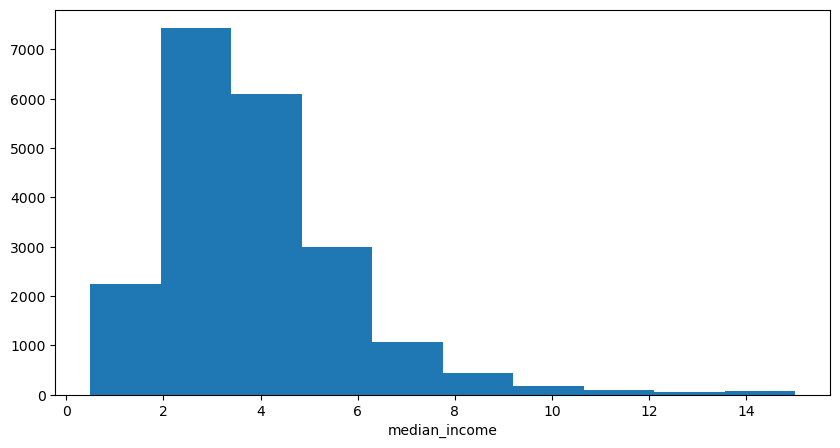

In [14]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(housingData["median_income"])
ax.set_xlabel("median_income")

Text(0.5, 0, 'median_house_value')

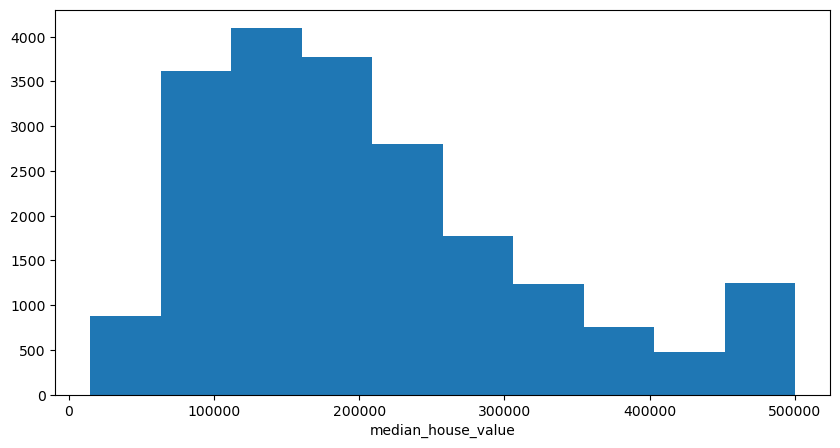

In [15]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(housingData["median_house_value"])
ax.set_xlabel("median_house_value")

In [16]:
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


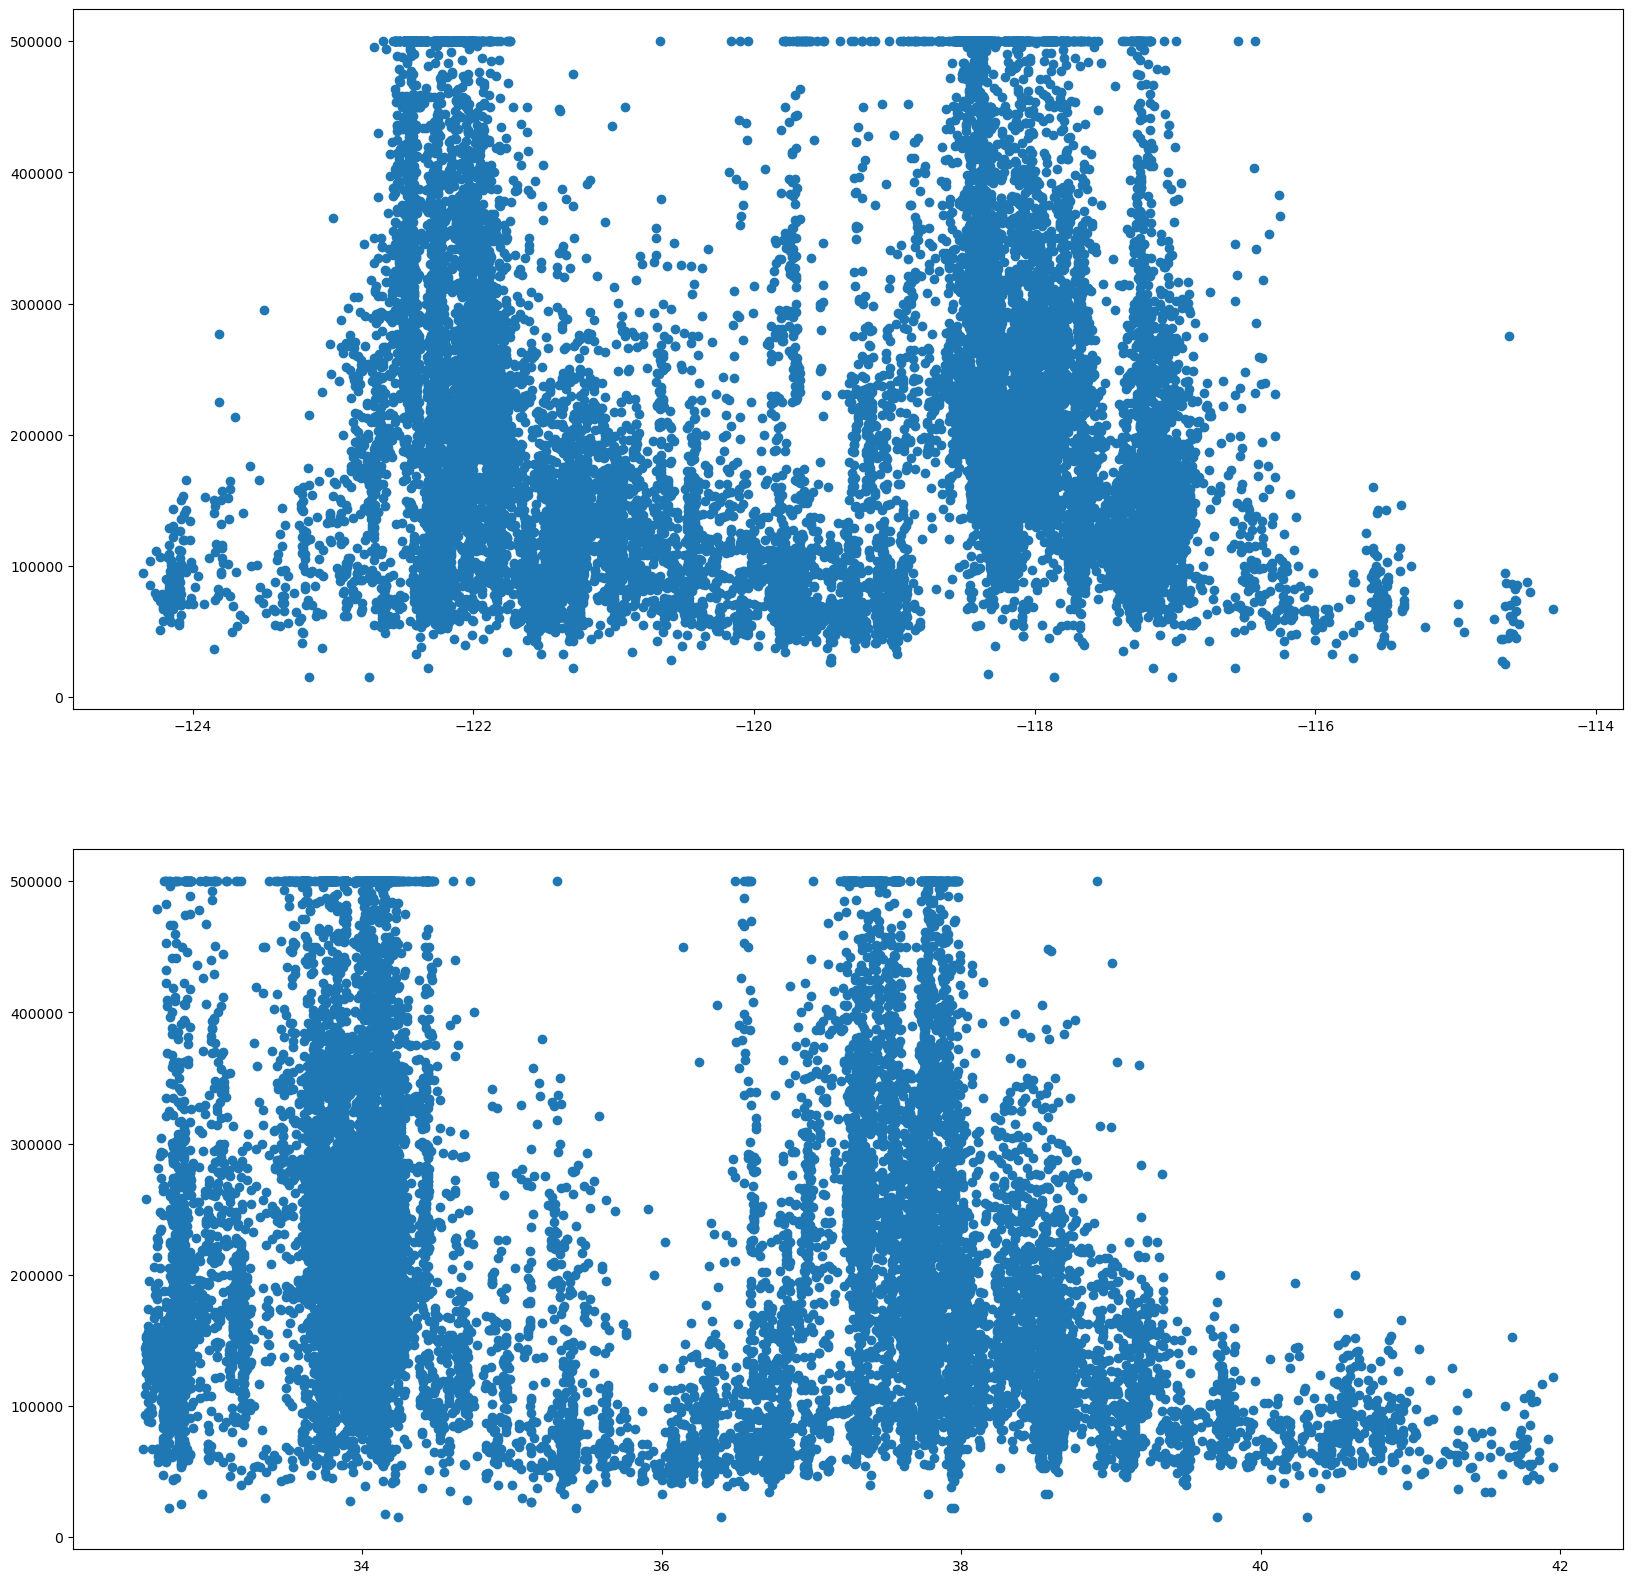

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20,20))
ax[0].scatter(housingData["longitude"],housingData["median_house_value"])
ax[1].scatter(housingData["latitude"],housingData["median_house_value"])

Text(0, 0.5, 'median house value')

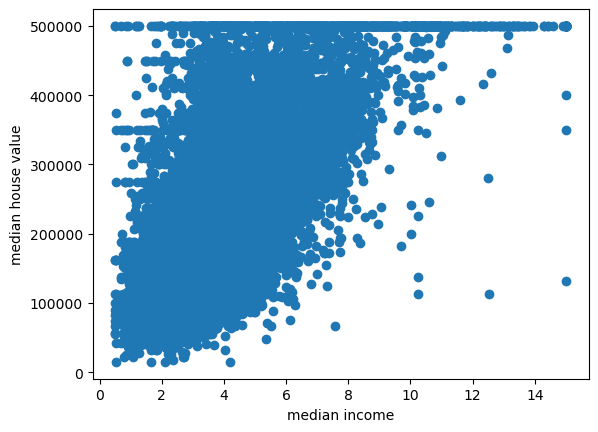

In [18]:
fig, ax = plt.subplots()
ax.scatter(housingData["median_income"],housingData["median_house_value"])
ax.set_xlabel("median income")
ax.set_ylabel("median house value")

In [19]:
latitudeBins = housingData[["latitude","median_house_value"]]
latitudeBins.describe()
bins = np.arange(start = 31, stop = 43, step = 2)
print(bins)
latitudeBins["bins"] = pd.cut(x = latitudeBins["latitude"], bins = bins)
print(latitudeBins)

[31 33 35 37 39 41]
       latitude  median_house_value      bins
0         37.88            452600.0  (37, 39]
1         37.86            358500.0  (37, 39]
2         37.85            352100.0  (37, 39]
3         37.85            341300.0  (37, 39]
4         37.85            342200.0  (37, 39]
...         ...                 ...       ...
20635     39.48             78100.0  (39, 41]
20636     39.49             77100.0  (39, 41]
20637     39.43             92300.0  (39, 41]
20638     39.43             84700.0  (39, 41]
20639     39.37             89400.0  (39, 41]

[20640 rows x 3 columns]


/tmp/ipykernel_25273/2607378252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latitudeBins["bins"] = pd.cut(x = latitudeBins["latitude"], bins = bins)


In [ ]:
result = latitudeBins.groupby('bins')['median_house_value'].mean()
print(result)

bins
(31, 33]    183498.283333
(33, 35]    226289.099860
(35, 37]    124065.662752
(37, 39]    221088.790308
(39, 41]    100168.189542
Name: median_house_value, dtype: float64
bins
(31, 33]    183498.283333
(33, 35]    226289.099860
(35, 37]    124065.662752
(37, 39]    221088.790308
(39, 41]    100168.189542
Name: median_house_value, dtype: float64


In [21]:
def binAndBar(data,
              start,
              stop,
              step,
              xlabel,
              ylabel = "median_house_value",
              method = "mean",
              figsize = (20,10)):
    '''
    Pass in Pandas DataFrame as well as the as well as the bins.
    The data will be split into bins and will make a bar plot grouped by those bins.
    The first columnn you pass will be the x in which the bins will be created.
    The second column you pass in will be the y
    You may also choose what to do with the data by passing in the method mean, sum or median, etc
    Parameters:
        data: reference dataframe
        xlabel: xlabel, use column from pandas dataFrame
        ylabel: ylabel, use column from pandas dataFrame
        method: group by mean, sum or median
    '''
    dataFrame = housingData[[xlabel, ylabel]]
    dataFrame.describe()
    bins = np.arange(start = start, stop = stop, step = step)
    dataFrame["bins"] = pd.cut(x = dataFrame[xlabel], bins = bins)

    if method == "mean":
        group = dataFrame.groupby('bins')[ylabel].mean()
    elif method == "sum":
        group = dataFrame.groupby('bins')[ylabel].sum()
    elif method == "median":
        group = dataFrame.groupby('bins')[ylabel].median()

    x = np.array([])
    y = np.array([])
    
    print("bins",len(bins))
    print(bins)
    print("group",len(group))
    print(group)
    
    for i in range(len(group)):
        x = np.append(x, bins[i])
        y = np.append(y, group.iloc[i])
    x = x.astype(str)

    for i in range(len(x)):
        x[i] = str(str(x[i])+"-"+str(float(x[i])+2))

    fig, ax = plt.subplots(figsize = figsize)
    ax.bar(x = x, height = y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [22]:
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


bins 12
[-125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114]
group 11
bins
(-125, -124]    1.105350e+07
(-124, -123]    1.613180e+07
(-123, -122]    9.588433e+08
(-122, -121]    5.590070e+08
(-121, -120]    1.420617e+08
(-120, -119]    1.963633e+08
(-119, -118]    1.415007e+09
(-118, -117]    8.913649e+08
(-117, -116]    6.880780e+07
(-116, -115]    8.713800e+06
(-115, -114]    2.150300e+06
Name: median_house_value, dtype: float64


/tmp/ipykernel_25273/4149832976.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["bins"] = pd.cut(x = dataFrame[xlabel], bins = bins)


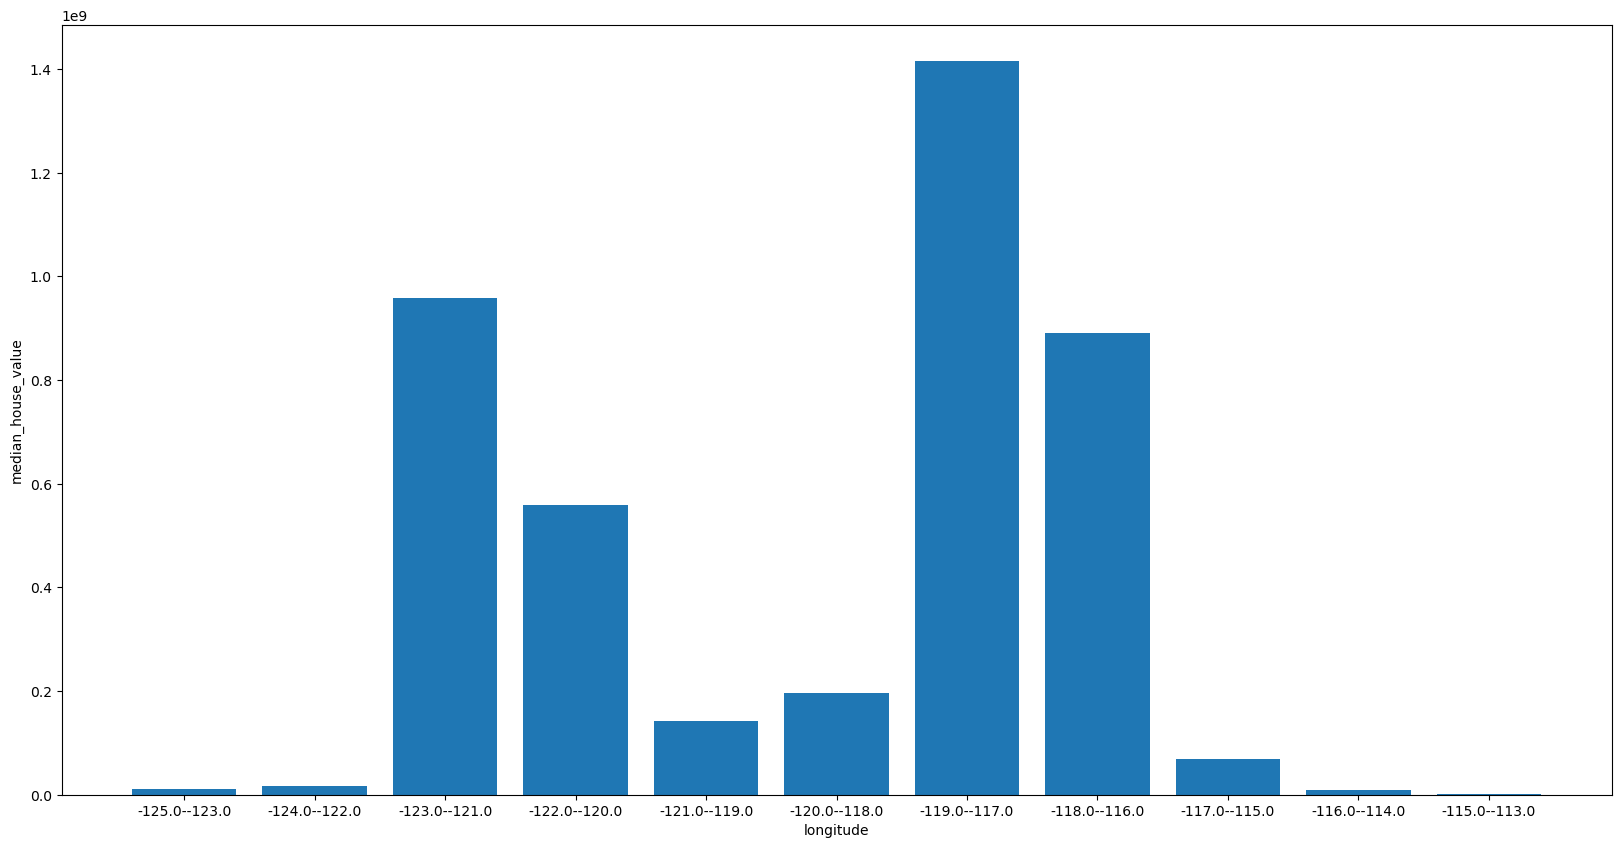

In [24]:
binAndBar(housingData, start = -125, stop = -113, step = 1, xlabel = "longitude", method = "sum")

bins 12
[-125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114]
group 11
bins
(-125, -124]     89865.853659
(-124, -123]    114409.921986
(-123, -122]    254335.096286
(-122, -121]    178084.431985
(-121, -120]    137390.429400
(-120, -119]    135329.656099
(-119, -118]    239750.345476
(-118, -117]    200037.015260
(-117, -116]    144251.159329
(-116, -115]     75118.965517
(-115, -114]     69364.516129
Name: median_house_value, dtype: float64


/tmp/ipykernel_25273/4149832976.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["bins"] = pd.cut(x = dataFrame[xlabel], bins = bins)


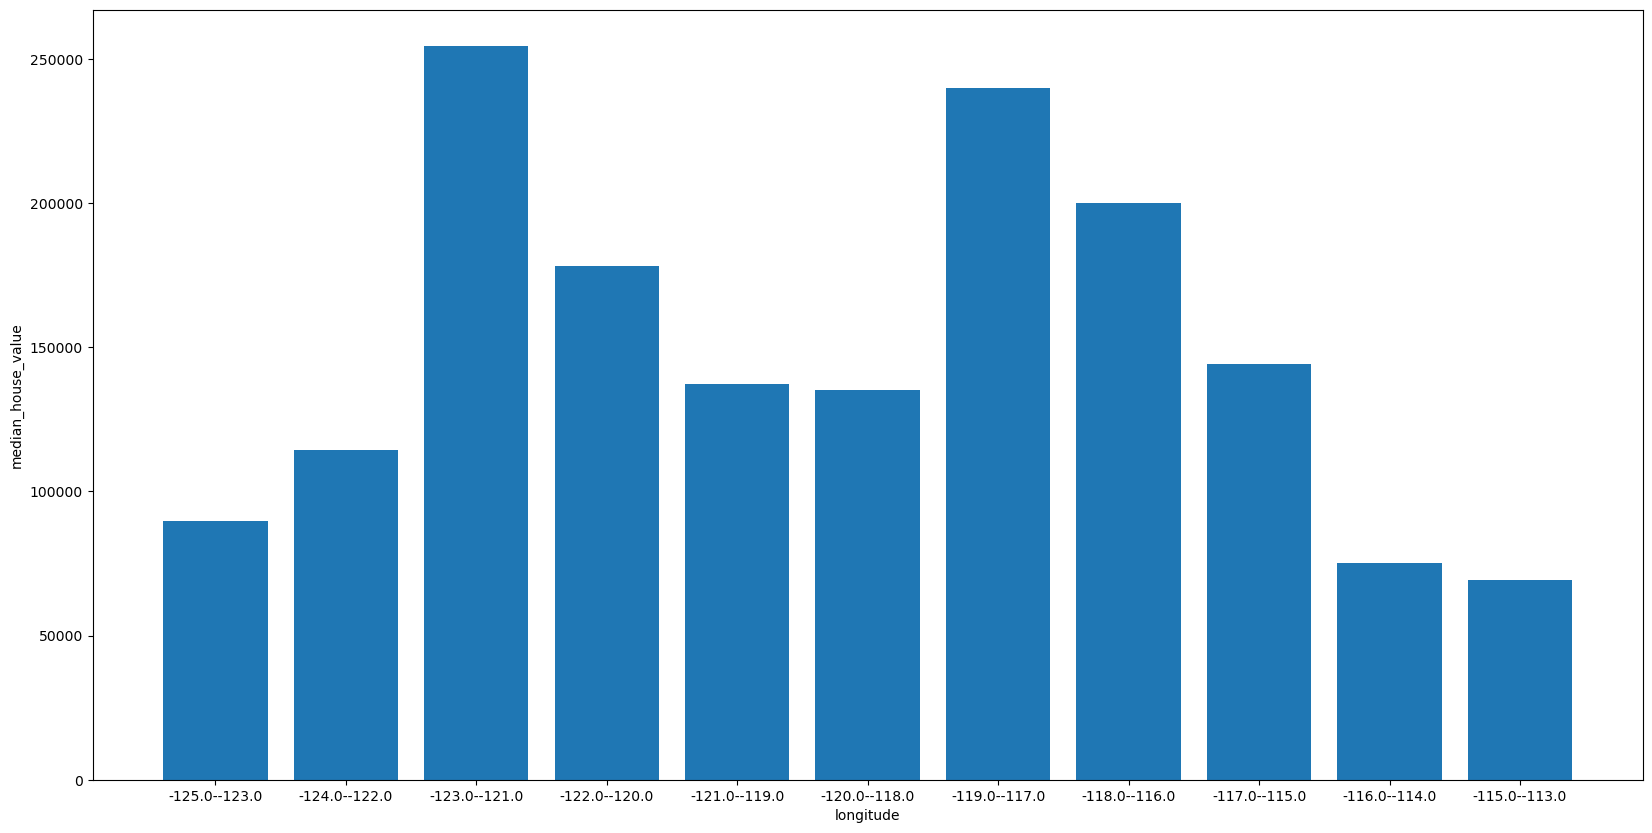

In [25]:
binAndBar(housingData, start = -125, stop = -113, step = 1, xlabel = "longitude")

/tmp/ipykernel_25273/4149832976.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["bins"] = pd.cut(x = dataFrame[xlabel], bins = bins)


bins 6
[31 33 35 37 39 41]
group 5
bins
(31, 33]    183498.283333
(33, 35]    226289.099860
(35, 37]    124065.662752
(37, 39]    221088.790308
(39, 41]    100168.189542
Name: median_house_value, dtype: float64


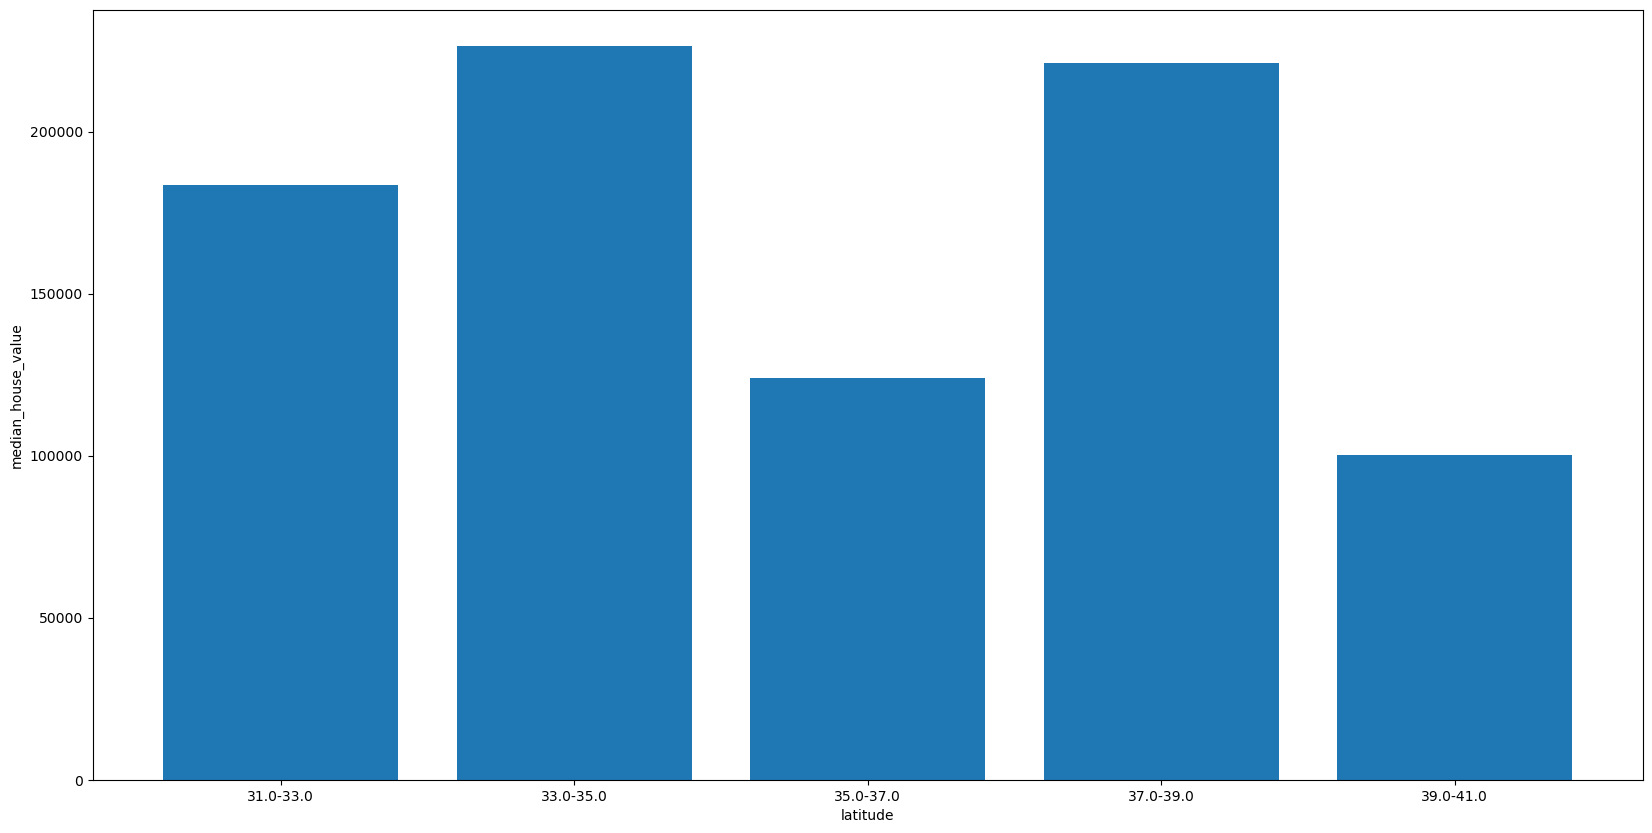

In [26]:
binAndBar(housingData, start = 31, stop = 43, step = 2, xlabel = "latitude")

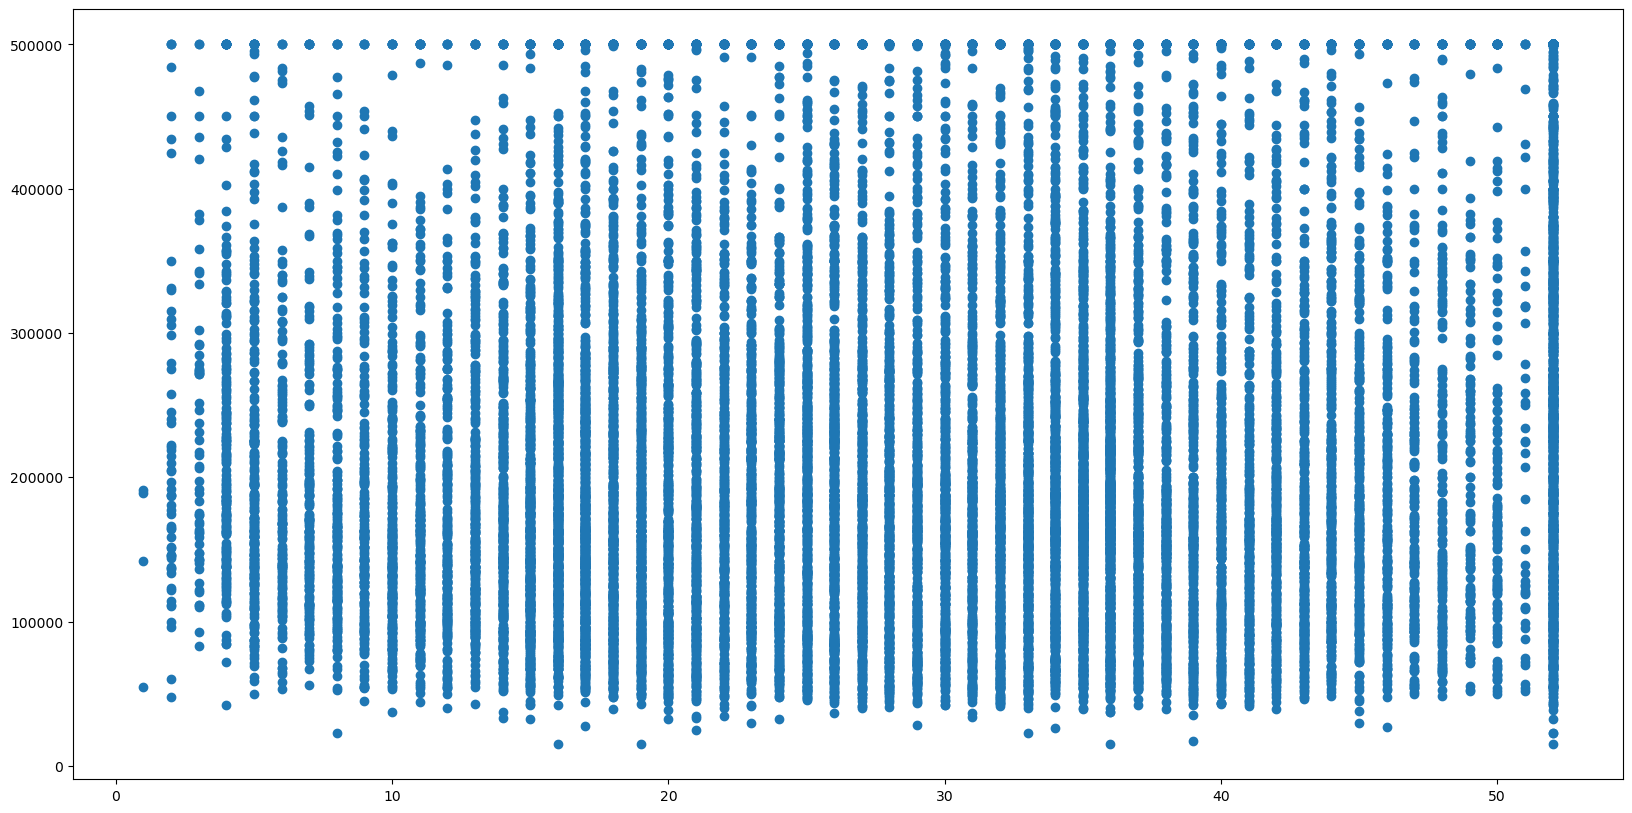

In [27]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(housingData["housing_median_age"],housingData["median_house_value"])

In [28]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


bins 23
[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47]
group 22
bins
(3, 5]      217558.204598
(5, 7]      198310.176119
(7, 9]      190553.060827
(9, 11]     178212.187259
(11, 13]    186596.129630
(13, 15]    185281.294372
(15, 17]    195578.099387
(17, 19]    193281.279851
(19, 21]    197861.283205
(21, 23]    207071.605667
(23, 25]    213738.167625
(25, 27]    208955.866305
(27, 29]    202751.976395
(29, 31]    203602.510707
(31, 33]    203523.777966
(33, 35]    210621.001322
(35, 37]    207492.118656
(37, 39]    200991.524246
(39, 41]    203163.893333
(41, 43]    196259.269071
(43, 45]    216941.129231
(45, 47]    196233.221219
Name: median_house_value, dtype: float64


/tmp/ipykernel_25273/4149832976.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["bins"] = pd.cut(x = dataFrame[xlabel], bins = bins)


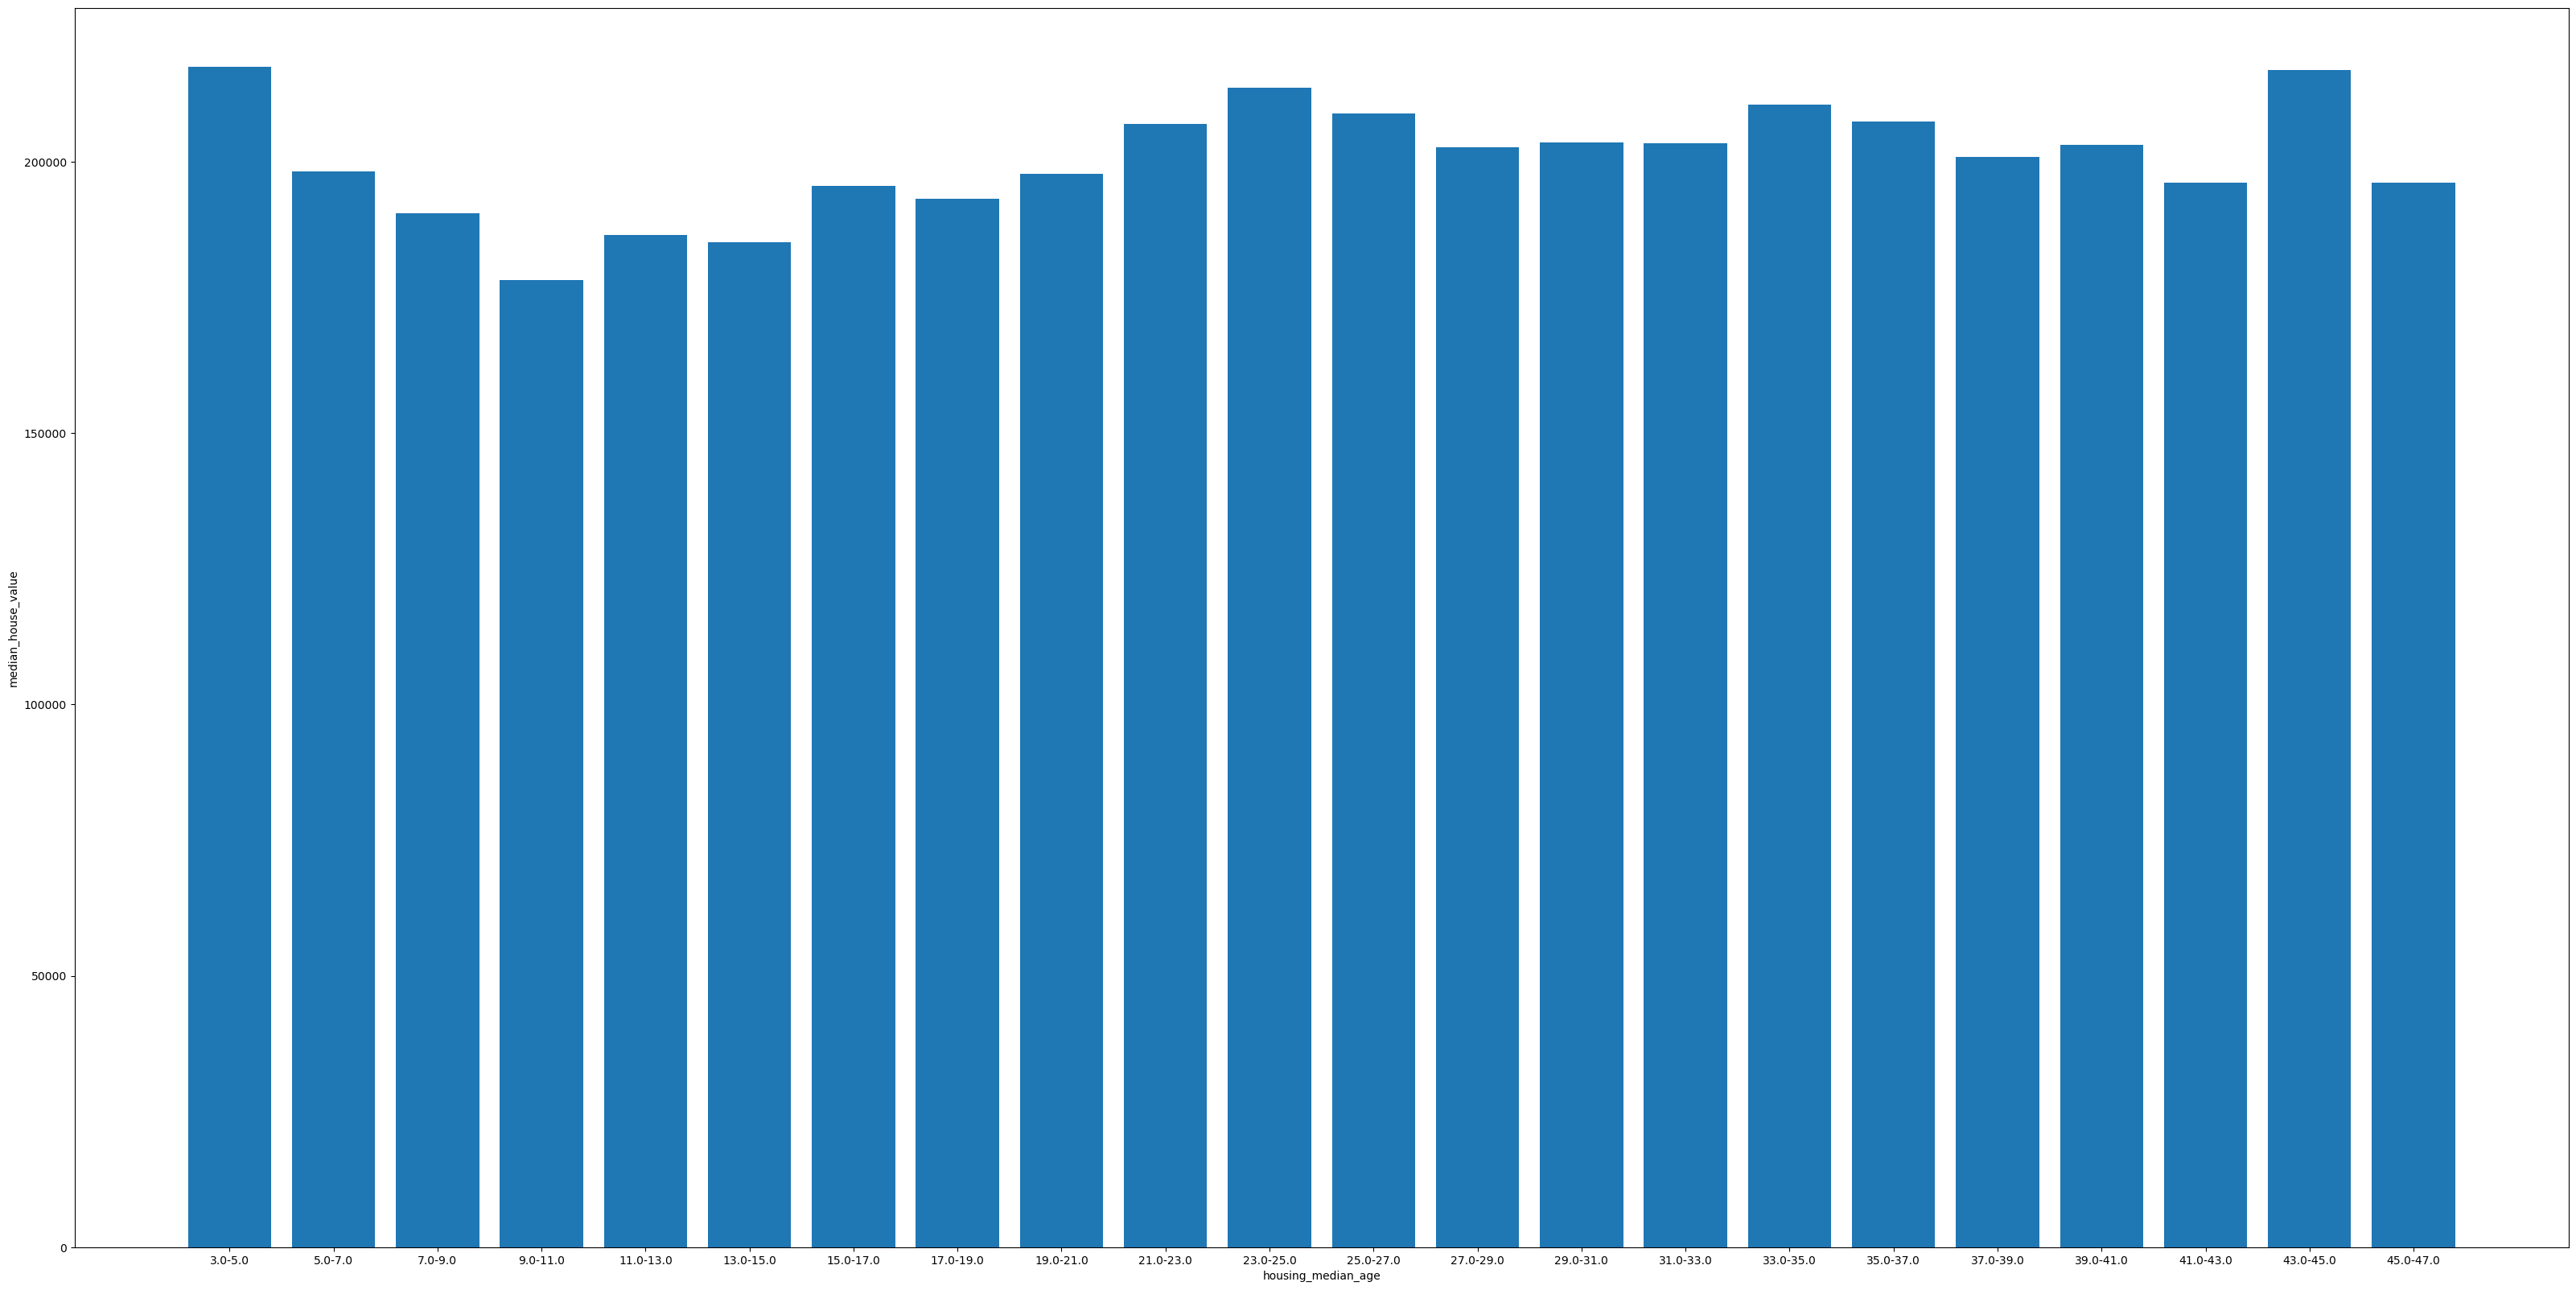

In [29]:
binAndBar(housingData, start = 3, stop = 49, step = 2, xlabel = "housing_median_age",figsize = (40,20))

In [30]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [31]:
housingDataSample = housingData.sample(frac = 0.05)
housingDataSample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7355,-118.17,33.96,25.0,2249.0,681.0,2621.0,628.0,2.3000,164200.0,<1H OCEAN
3979,-118.61,34.19,28.0,3824.0,749.0,1790.0,701.0,4.1154,246400.0,<1H OCEAN
1023,-119.93,38.72,15.0,2061.0,465.0,573.0,196.0,2.2417,97900.0,INLAND
2825,-119.09,35.41,12.0,3449.0,522.0,1754.0,551.0,5.6235,130600.0,INLAND
5103,-118.30,33.95,50.0,1843.0,326.0,892.0,314.0,3.1346,120000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
8097,-118.21,33.81,45.0,1816.0,398.0,1524.0,388.0,3.8586,157900.0,NEAR OCEAN
14130,-117.09,32.76,10.0,1922.0,577.0,1595.0,545.0,1.5208,118800.0,NEAR OCEAN
9203,-119.64,37.31,15.0,2654.0,530.0,1267.0,489.0,2.8393,104400.0,INLAND
10427,-117.63,33.46,7.0,7684.0,1088.0,2812.0,1057.0,6.3401,387300.0,NEAR OCEAN


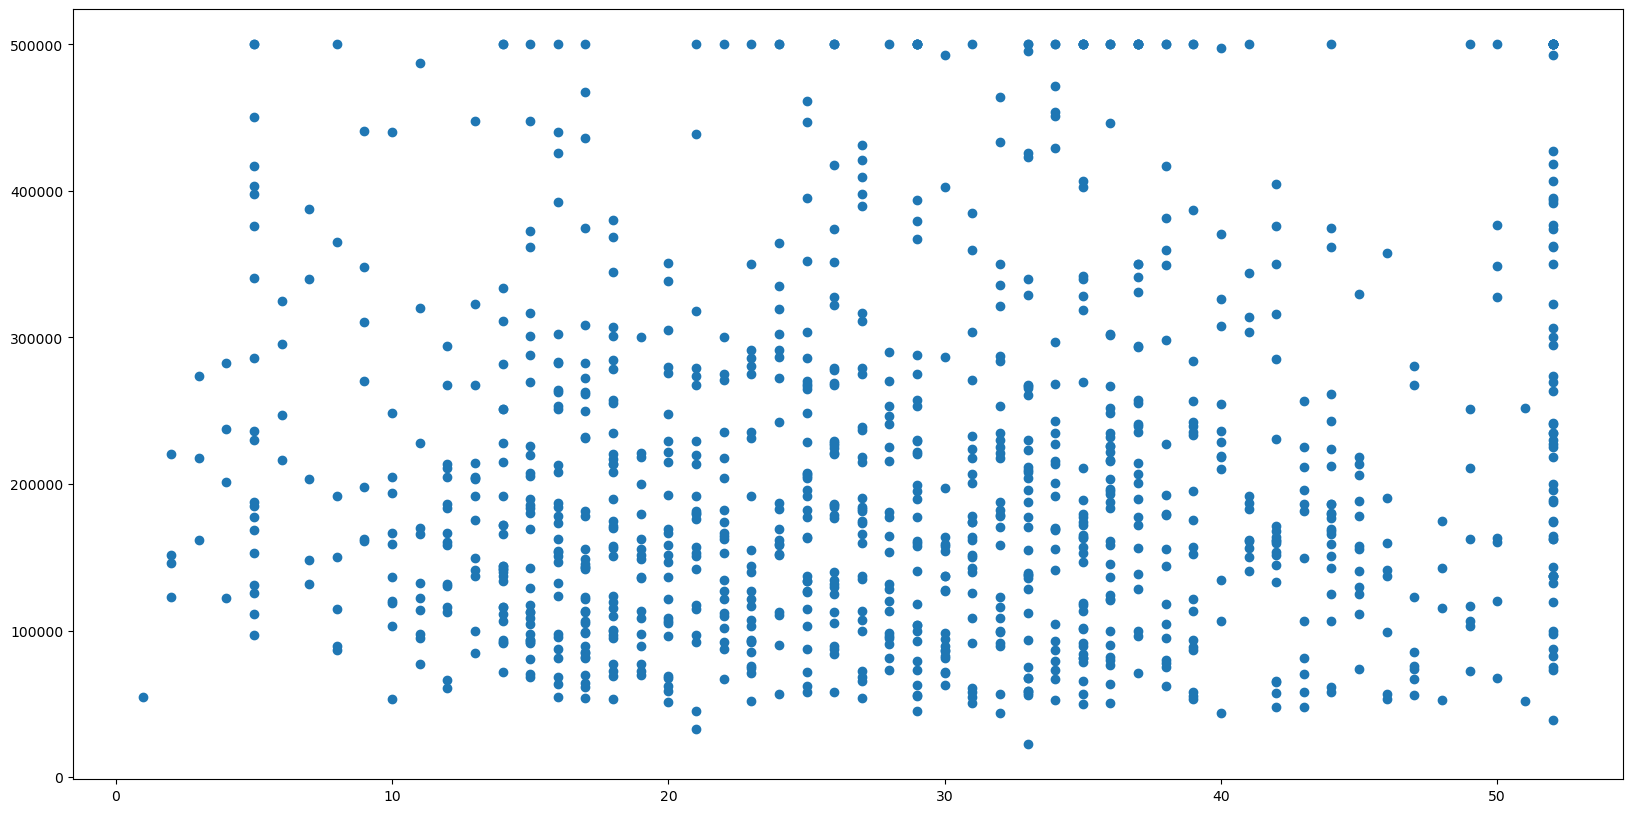

In [32]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(housingDataSample["housing_median_age"],housingDataSample["median_house_value"])

/tmp/ipykernel_25273/4152491567.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.corr()


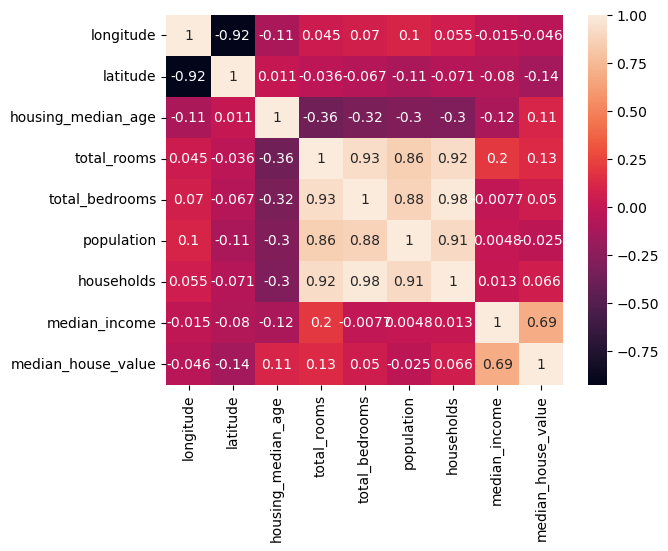

In [33]:
graphCorr(housingData)

In [34]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [35]:
housingData.max()

longitude                -114.31
latitude                   41.95
housing_median_age          52.0
total_rooms              39320.0
total_bedrooms            6445.0
population               35682.0
households                6082.0
median_income            15.0001
median_house_value      500001.0
ocean_proximity       NEAR OCEAN
dtype: object

/tmp/ipykernel_25273/4149832976.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["bins"] = pd.cut(x = dataFrame[xlabel], bins = bins)


bins 100
[    0.    393.2   786.4  1179.6  1572.8  1966.   2359.2  2752.4  3145.6
  3538.8  3932.   4325.2  4718.4  5111.6  5504.8  5898.   6291.2  6684.4
  7077.6  7470.8  7864.   8257.2  8650.4  9043.6  9436.8  9830.  10223.2
 10616.4 11009.6 11402.8 11796.  12189.2 12582.4 12975.6 13368.8 13762.
 14155.2 14548.4 14941.6 15334.8 15728.  16121.2 16514.4 16907.6 17300.8
 17694.  18087.2 18480.4 18873.6 19266.8 19660.  20053.2 20446.4 20839.6
 21232.8 21626.  22019.2 22412.4 22805.6 23198.8 23592.  23985.2 24378.4
 24771.6 25164.8 25558.  25951.2 26344.4 26737.6 27130.8 27524.  27917.2
 28310.4 28703.6 29096.8 29490.  29883.2 30276.4 30669.6 31062.8 31456.
 31849.2 32242.4 32635.6 33028.8 33422.  33815.2 34208.4 34601.6 34994.8
 35388.  35781.2 36174.4 36567.6 36960.8 37354.  37747.2 38140.4 38533.6
 38926.8]
group 99
bins
(0.0, 393.2]          180222.572973
(393.2, 786.4]        171287.924324
(786.4, 1179.6]       173990.768939
(1179.6, 1572.8]      186004.375178
(1572.8, 1966.0]      

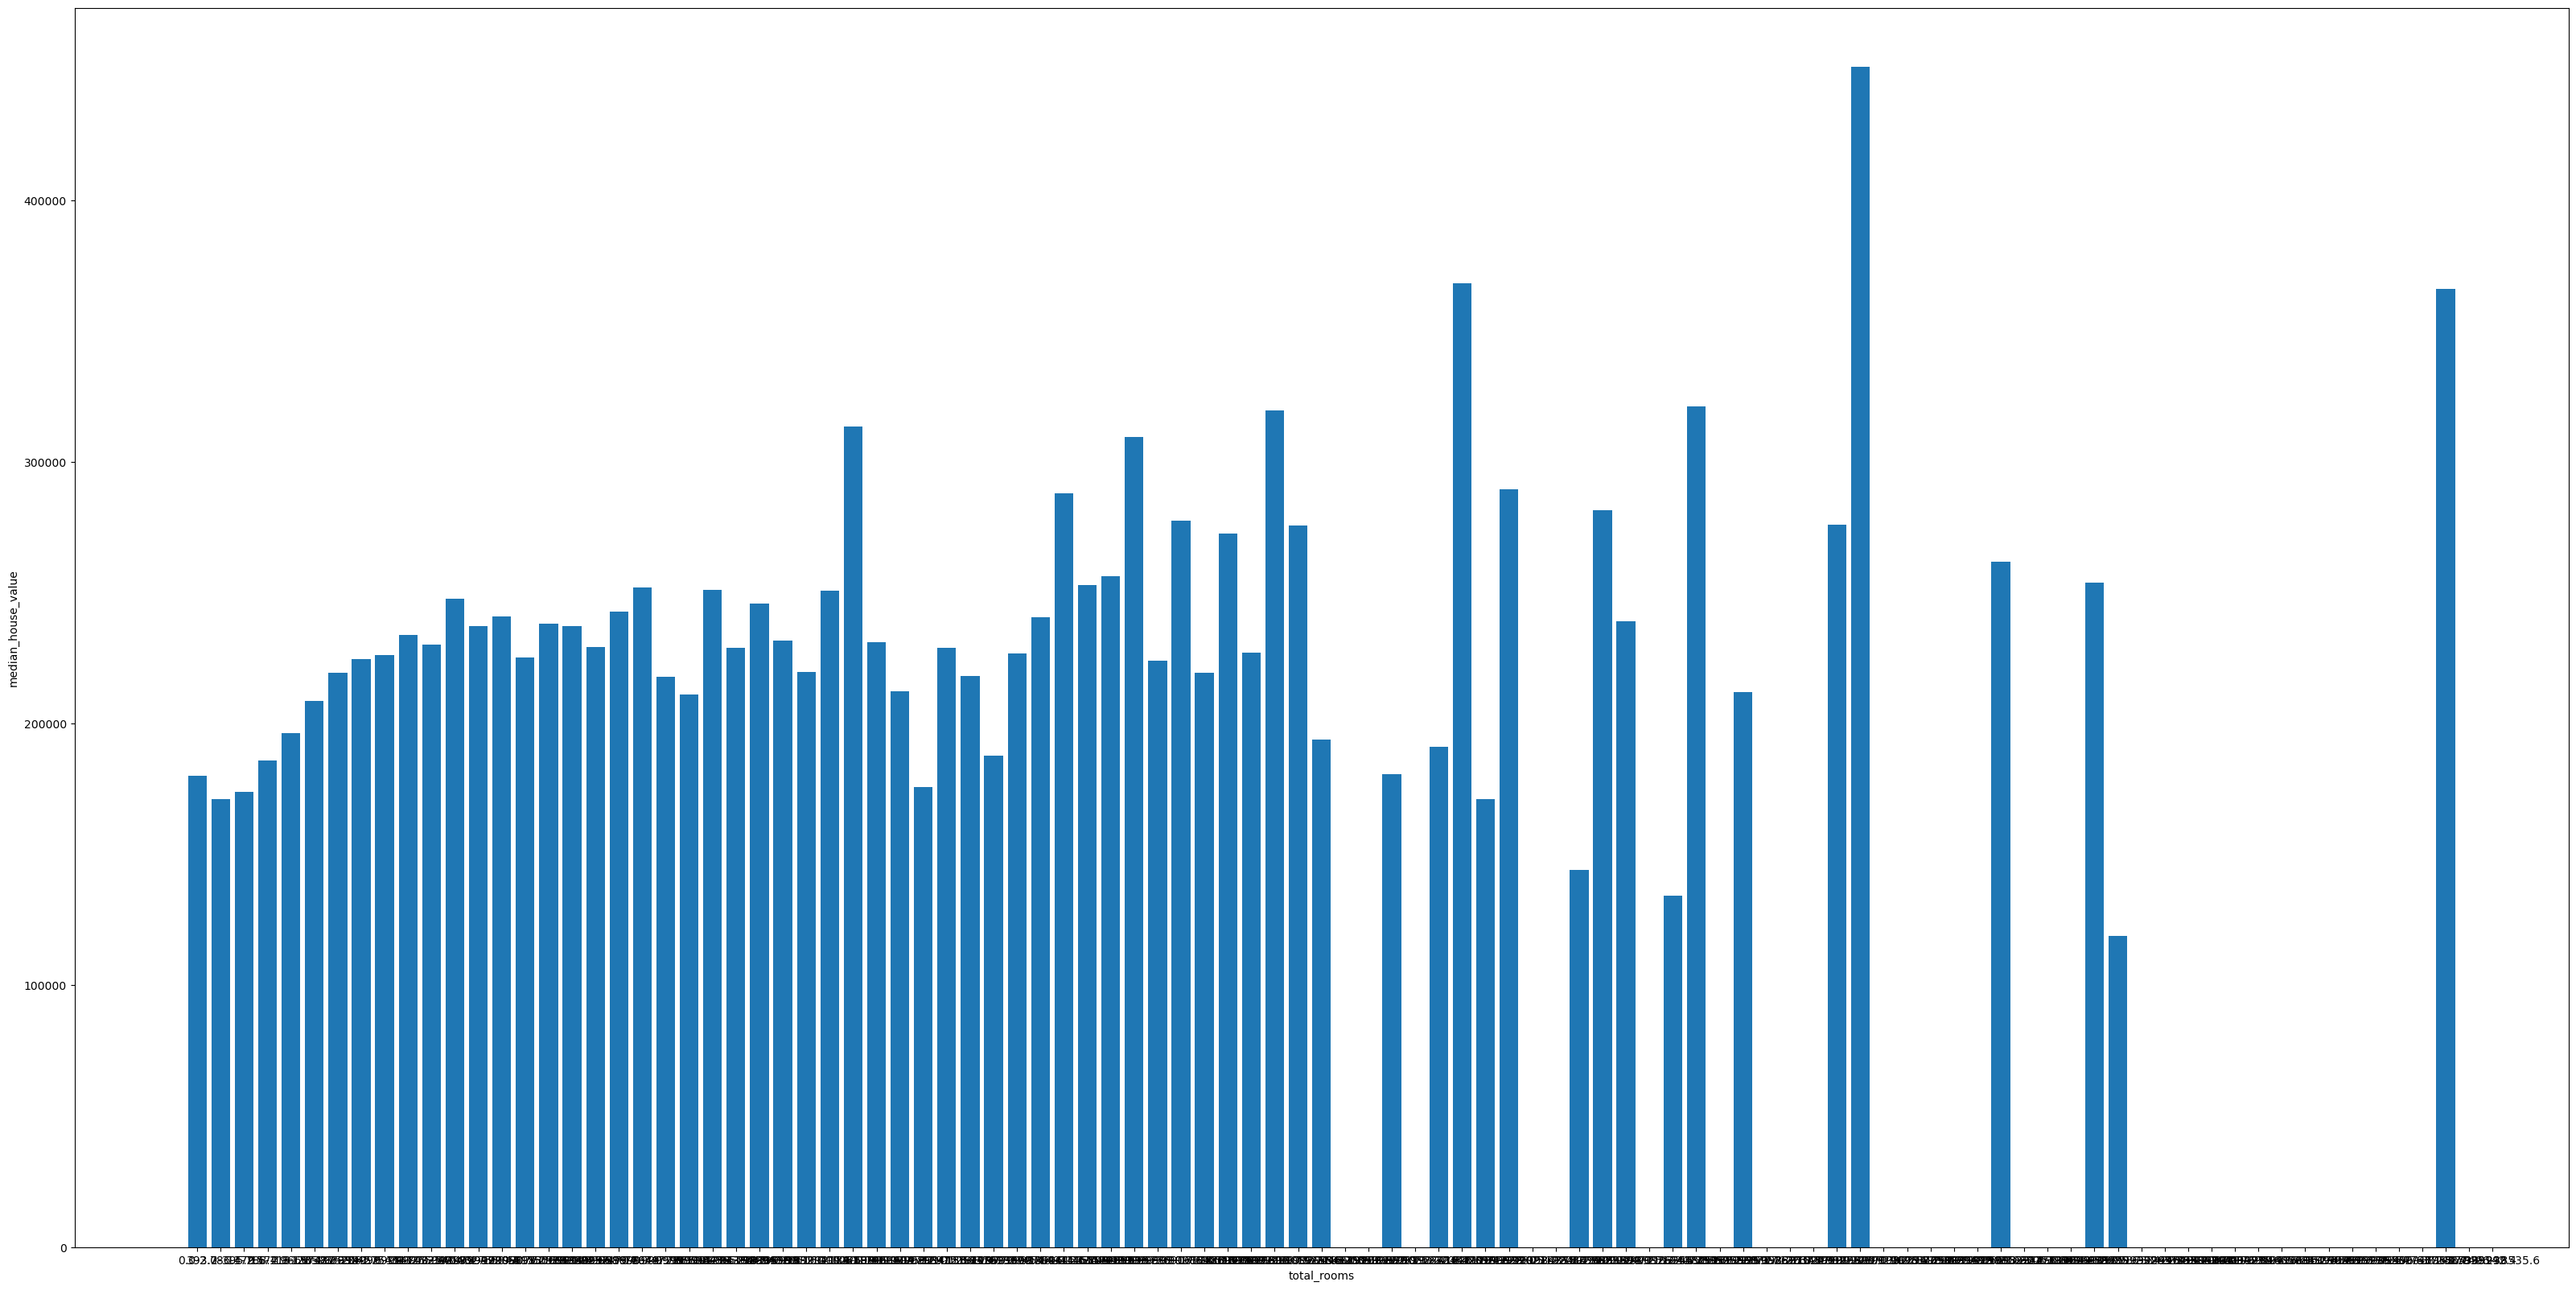

In [36]:
binAndBar(housingData,
          start = 0,
          stop = housingData['total_rooms'].max(),
          step = (housingData['total_rooms'].max())/100,
          xlabel = "total_rooms",
          figsize = (40,20))

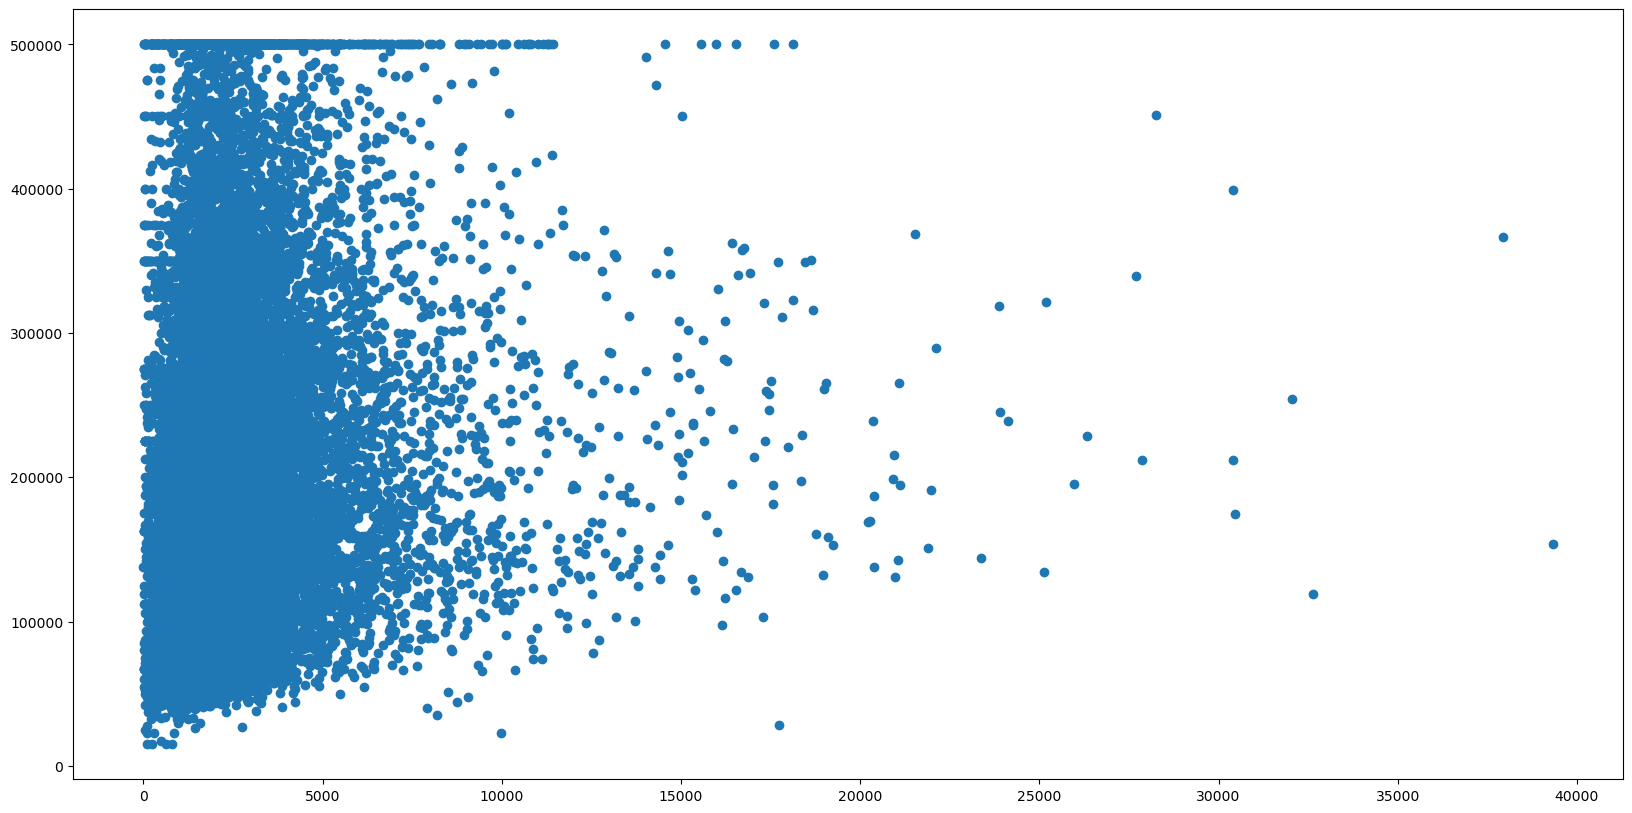

In [37]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(housingData["total_rooms"],housingData["median_house_value"])

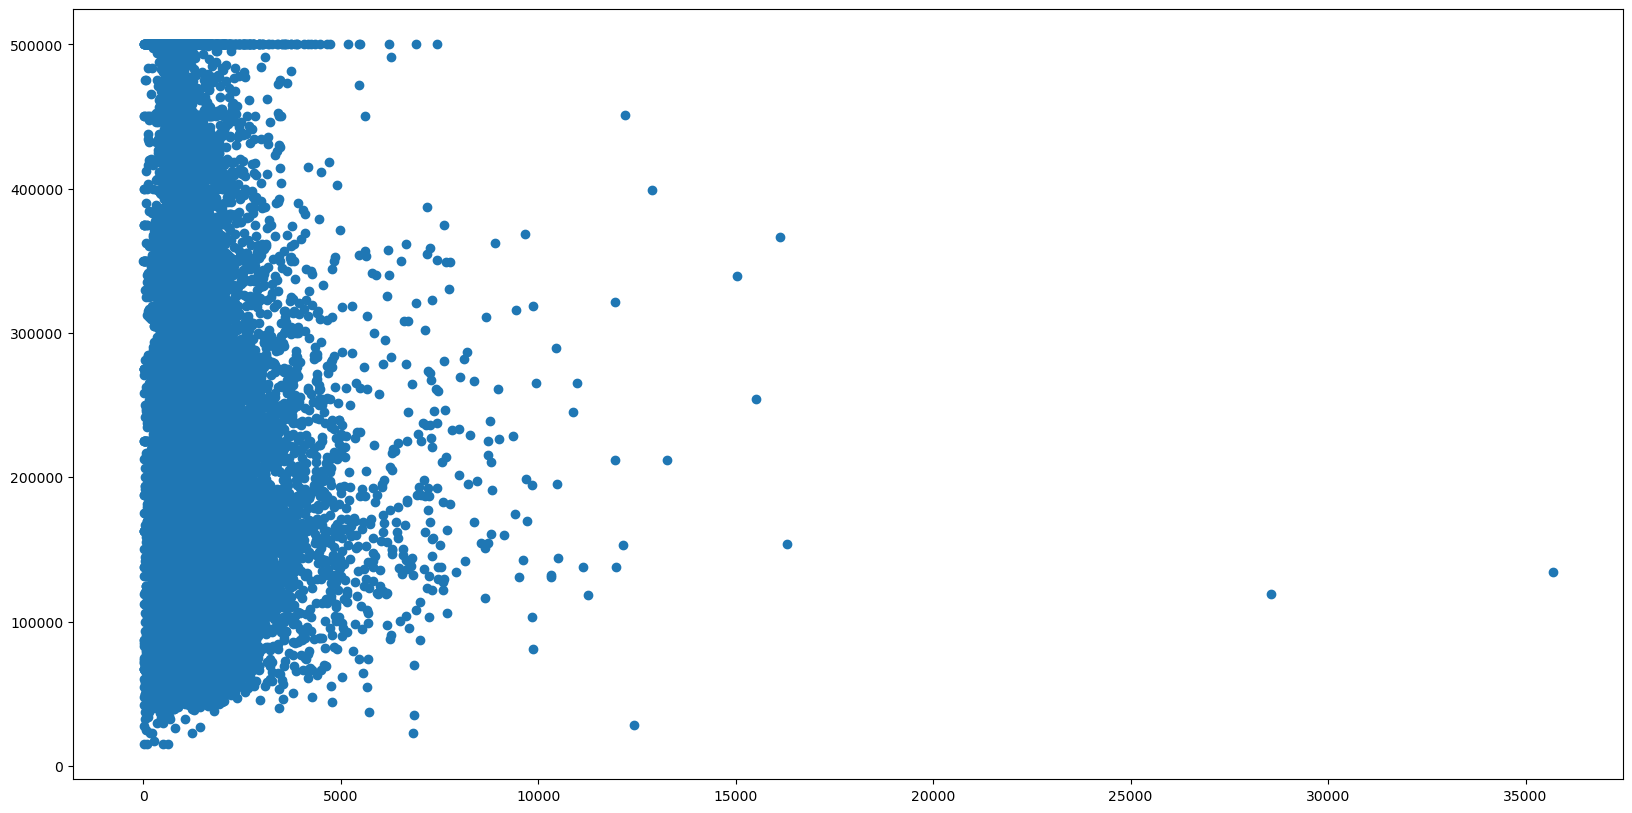

In [38]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(housingData["population"],housingData["median_house_value"])

In [39]:
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

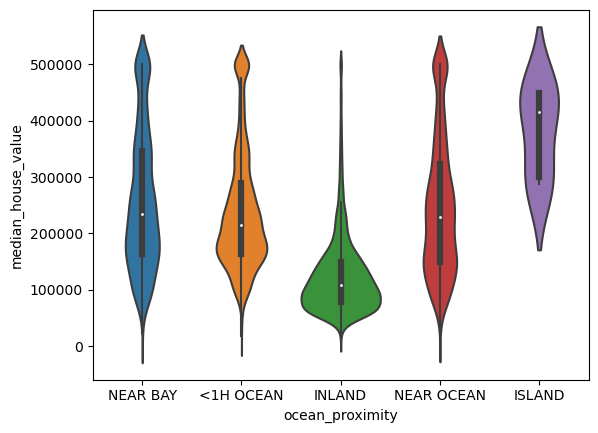

In [40]:
fig, ax = plt.subplots()
sns.violinplot(data = housingData, x = "ocean_proximity", y = "median_house_value", ax = ax)

<Axes: >

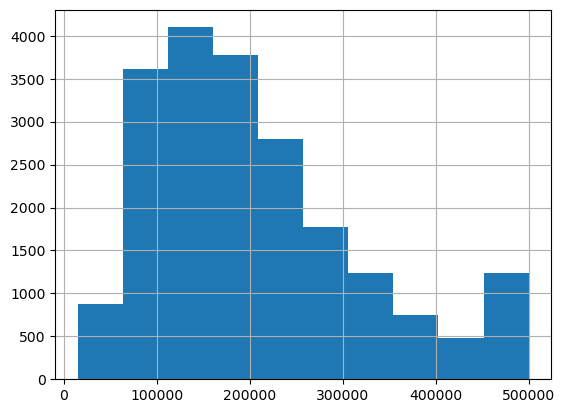

In [41]:
housingData["median_house_value"].hist()

In [42]:
housingData["median_house_value"][housingData["median_house_value"] > 495000].value_counts()

500001.0    965
500000.0     27
495500.0      3
495600.0      2
496400.0      2
497600.0      1
498700.0      1
498400.0      1
499000.0      1
497400.0      1
498600.0      1
495400.0      1
495800.0      1
499100.0      1
495900.0      1
496000.0      1
498800.0      1
Name: median_house_value, dtype: int64

<Axes: xlabel='median_house_value', ylabel='Count'>

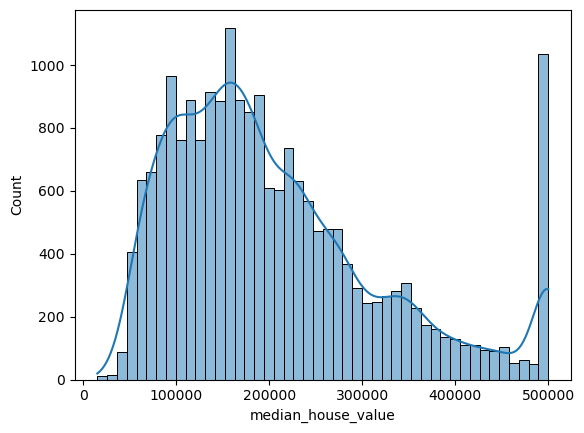

In [43]:
sns.histplot(data = housingData, x = "median_house_value", kde = True)

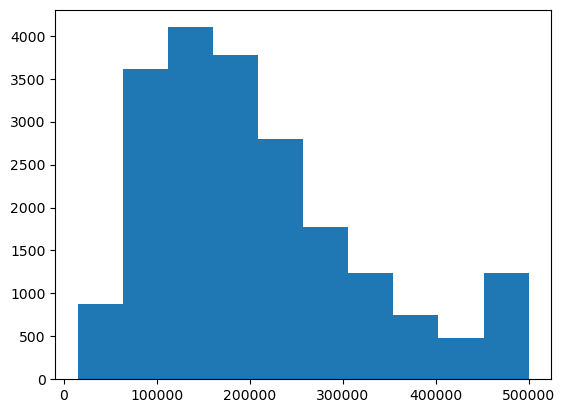

In [44]:
plt.hist(housingData["median_house_value"])
plt.show()

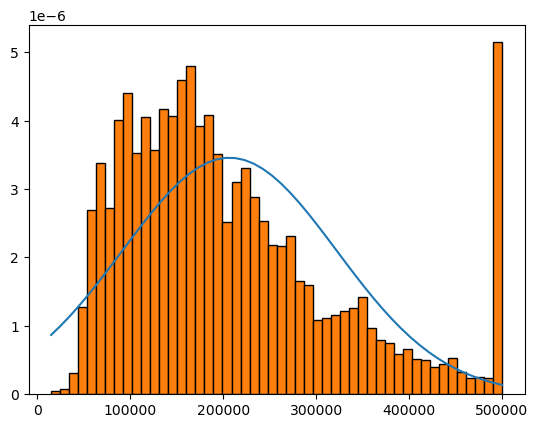

In [45]:

def distroPlot(data, x = None, bins = 50):
    if x == None:
        std = np.std(data)
        mean = np.mean(data)
        domain = np.linspace(np.min(data),
                             np.max(data))
        plt.plot(domain,norm.pdf(domain,mean,std))
        plt.hist(data,bins = bins, edgecolor = 'black', density = True)
    if x != None:
        std = np.std(data[x])
        mean = np.mean(data[x])
        domain = np.linspace(np.min(data[x]),
                             np.max(data[x]))
        plt.plot(domain,norm.pdf(domain,mean,std))
        plt.hist(data[x],bins = bins, edgecolor = 'black', density = True)

distroPlot(housingData["median_house_value"])

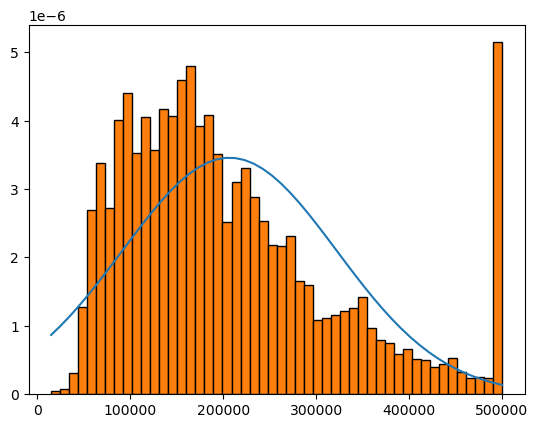

In [46]:
distroPlot(housingData, x = "median_house_value")

In [47]:
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [48]:
housingData.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [49]:
def evaluateModel(model, X_test, y_test):
    y_preds = model.predict(X_test)
    print("R2:",r2_score(y_test, y_preds))
    print("MSE:",mean_squared_error(y_test, y_preds))
    print("RMSE:",sqrt(mean_squared_error(y_test, y_preds)))
    print("MAE:",mean_absolute_error(y_test, y_preds))
    print("EVS:",explained_variance_score(y_test, y_preds))
    

In [50]:
housingData.dropna(inplace = True)

X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
RidgeRegressor = linear_model.Ridge()
RidgeRegressor.fit(X_train, y_train)
evaluateModel(RidgeRegressor,X_test,y_test)
cross_val_score(RidgeRegressor, X, y, cv = 10)

R2: 0.6511741858075433
MSE: 4626285550.439109
RMSE: 68016.80344179009
MAE: 50578.37773537764
EVS: 0.6513769330839587


array([0.53120194, 0.64315414, 0.4893322 , 0.5596694 , 0.60390899,
       0.55397515, 0.45342616, 0.48181539, 0.51552988, 0.62249549])

In [51]:
housingData.dropna(inplace = True)

X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
LassoRegressor = linear_model.Lasso()
LassoRegressor.fit(X_train, y_train)
evaluateModel(LassoRegressor,X_test,y_test)
cross_val_score(LassoRegressor, X, y, cv = 5)

R2: 0.6243946806707652
MSE: 5075210733.0485325
RMSE: 71240.51328456675
MAE: 51518.47469120553
EVS: 0.6246830775196046


array([0.58888563, 0.52421016, 0.58435766, 0.54621415, 0.69187652])

In [52]:
housingData.dropna(inplace = True)

X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
ElasticRegressor = linear_model.ElasticNet()
ElasticRegressor.fit(X_train, y_train)
evaluateModel(ElasticRegressor,X_test,y_test)
cross_val_score(ElasticRegressor, X, y, cv = 10)

R2: 0.5939167142062661
MSE: 5374558502.724263
RMSE: 73311.38044481404
MAE: 54710.77301694662
EVS: 0.5939176373799926


array([0.61047168, 0.53096158, 0.46375345, 0.57921159, 0.56915576,
       0.54189149, 0.22344472, 0.41984686, 0.34385897, 0.56370416])

In [53]:
from sklearn.svm import LinearSVR
housingData.dropna(inplace = True)

X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
LinearSVR = LinearSVR(max_iter = 100000)
LinearSVR.fit(X_train, y_train)
evaluateModel(LinearSVR,X_test,y_test)
#cross_val_score(LinearSVR, X, y, cv = 10)

R2: 0.341416841869699
MSE: 8496867906.626269
RMSE: 92178.4568466313
MAE: 68986.84907716751
EVS: 0.35577535734084187


In [54]:
%%time

#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([1, 2, 3, 4, 5, 6])
#X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
#y = housingData['median_house_value']
class Folds():
    def __init__(self):
        pass
    
def createFolds(X,cv = 5, shuffle = True):
    kf = KFold(n_splits=cv, shuffle=shuffle)
    kf.get_n_splits(X)

    Trainfolds = np.array([])
    Testfolds = np.array([])

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")
        print(train_index)
        Trainfolds = np.append(Trainfolds, train_index)
        Testfolds = np.append(Testfolds, test_index)
    return Trainfolds, Testfolds


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.38 µs


In [86]:
class Folds:
    def __init__(self,trainingData,testingData):
        self.trainingData = trainingData
        self.testingData = testingData
        
def createFolds(X,cv = 5, shuffle = True):
    kf = KFold(n_splits=cv, shuffle=shuffle)
    kf.get_n_splits(X)

    folds = []

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")
        folds.append(Folds(train_index, test_index))
    return np.array(folds)


In [89]:

X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[1, 2], [3, 4], [1, 2], [3, 4]])
folds = createFolds(X, cv = 5)

print("\n\n\n")
print(folds[0].trainingData)
print()
print(folds[0].testingData)


Fold 0:
  Train: index=[    0     1     2 ... 20428 20429 20432]
  Test:  index=[    5    10    17 ... 20426 20430 20431]
Fold 1:
  Train: index=[    1     2     3 ... 20428 20430 20431]
  Test:  index=[    0     6     7 ... 20424 20429 20432]
Fold 2:
  Train: index=[    0     1     4 ... 20430 20431 20432]
  Test:  index=[    2     3     8 ... 20414 20420 20425]
Fold 3:
  Train: index=[    0     2     3 ... 20430 20431 20432]
  Test:  index=[    1     4    12 ... 20409 20417 20418]
Fold 4:
  Train: index=[    0     1     2 ... 20430 20431 20432]
  Test:  index=[   11    13    18 ... 20421 20427 20428]




[    0     1     2 ... 20428 20429 20432]

[    5    10    17 ... 20426 20430 20431]


In [56]:
len(housingData)

20433

In [57]:
len(Trainfolds)

81732

In [58]:
Trainfolds

array([0.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.0430e+04, 2.0431e+04,
       2.0432e+04])

In [71]:
housingData.dropna(inplace = True)

X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
baggingRegressor = BaggingRegressor(n_jobs = -1)
baggingRegressor.fit(X_train, y_train)
evaluateModel(baggingRegressor,X_test,y_test)
cross_val_score(baggingRegressor, X, y, cv = 10)

R2: 0.7760630577613121
MSE: 2964362256.3214927
RMSE: 54445.957208239925
MAE: 35280.132958160015
EVS: 0.7763701502654223


array([-0.22367057,  0.64243941,  0.69216721,  0.59737996,  0.74213085,
        0.60248166,  0.43169415,  0.50463659,  0.38148173,  0.60972278])

In [96]:
def myCrossValScore(model, X, y, cv = 5):
    folds = createFolds(X, cv = cv)
    scores = np.array([])
    X_train = np.array([])
    y_train = np.array([])
    X_test = np.array([])
    y_test = np.array([])
    size = len(folds)
    print("\n\n\n\n\n\n\n")
    for i in range(len(folds)):
        print(i)
        print(folds[i].trainingData)
        print(folds[i].testingData)
        #print("index is ",round(size*i),"to",round(size+size*i))
#        for test in range(round(size*i),round(size+size*i)):
#            index = Testfolds[test]
#            X_test = np.append(X_test,X[index])
#            y_test = np.append(y_test,y[index])
#        for train in range(round(size*i)):
#            index = Trainfolds[train]
#            X_train = np.append(X_train,X[index])
#            y_train = np.append(y_train,y[index])
#        for train in range(round(size+size*i),len(Trainfolds)):
#            index = Trainfolds[train]
#            X_train = np.append(X_train,X[index])
#            y_train = np.append(y_train,y[index])

myCrossValScore(baggingRegressor, X, y, cv = 5)

Fold 0:
  Train: index=[    1     2     3 ... 20430 20431 20432]
  Test:  index=[    0    10    18 ... 20409 20410 20415]
Fold 1:
  Train: index=[    0     1     2 ... 20429 20431 20432]
  Test:  index=[    8    13    14 ... 20423 20424 20430]
Fold 2:
  Train: index=[    0     2     4 ... 20430 20431 20432]
  Test:  index=[    1     3     6 ... 20422 20425 20429]
Fold 3:
  Train: index=[    0     1     3 ... 20429 20430 20431]
  Test:  index=[    2     5    11 ... 20426 20428 20432]
Fold 4:
  Train: index=[    0     1     2 ... 20429 20430 20432]
  Test:  index=[    4     7    12 ... 20400 20427 20431]








0
[    1     2     3 ... 20430 20431 20432]
[    0    10    18 ... 20409 20410 20415]
1
[    0     1     2 ... 20429 20431 20432]
[    8    13    14 ... 20423 20424 20430]
2
[    0     2     4 ... 20430 20431 20432]
[    1     3     6 ... 20422 20425 20429]
3
[    0     1     3 ... 20429 20430 20431]
[    2     5    11 ... 20426 20428 20432]
4
[    0     1     2 ... 20429 20430 2

In [ ]:
%%time
X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']
cross_val_score(baggingRegressor, X, y, cv = 10)

In [ ]:
%%time
X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
baggingRegressor = BaggingRegressor(n_jobs = -1)
baggingRegressor.fit(X_train, y_train)

In [ ]:
%%time
cross_val_score(baggingRegressor, X, y, cv = 10)

In [ ]:
baggingRegressor.score(X_test, y_test)

In [ ]:
r2_scores, poor_r2_indices

In [ ]:
housingData.dropna(inplace = True)

X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
linearRegressor = linear_model.LinearRegression()
linearRegressor.fit(X_train, y_train)
evaluateModel(linearRegressor,X_test,y_test)
cross_val_score(linearRegressor, X, y, cv = 10)

In [ ]:
housingData.dropna(inplace = True)

X = housingData.drop(['median_house_value','ocean_proximity'], axis = 1)
y = housingData['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
ensembleLinearRegressor = BaggingRegressor(estimator = linear_model.LinearRegression())
ensembleLinearRegressor.fit(X_train, y_train)
evaluateModel(ensembleLinearRegressor,X_test,y_test)
cross_val_score(ensembleLinearRegressor, X, y, cv = 10)

In [ ]:

y_preds = cross_val_predict(estimator = baggingRegressor,
                            X = X,
                            y = y,
                            cv = 10,
                            n_jobs = -1,
                            verbose = 1)